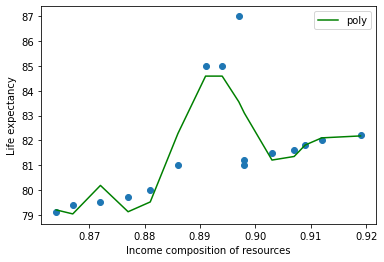

In [2]:
import numpy as np #linearalgebra
import pandas as pd #dataprocessing and reading of csv file\
from scipy.stats import pearsonr
import os

data=pd.read_csv('Life-Expectancy-Data.csv')
# prepare data
data=data[data['Country']=='Canada']
final_data=data.sort_values(by=['Year'], ascending=True)
final_data = final_data[final_data['Income composition of resources'].notna()]#removenavalueswhichareinfinity/nothing
final_data = final_data[final_data['Hepatitis B'].notna()]
x=final_data[['Income composition of resources', 'Hepatitis B']].values #Hepatitis B (HepB) immunization coverage among 1-year-olds (%).
y=final_data['Life expectancy '].values
#Human Development Index in terms of income composition of resources (index ranging from 0 to 1).

data_tr=data[data['Country']=='Canada']

final_data=data_tr.sort_values(by=['Year'], ascending=True)

x=final_data['Income composition of resources'].values.reshape(-1,1)

y=final_data['Life expectancy '].values.reshape(-1,1)

import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlabel("Income composition of resources")

plt.ylabel('Life expectancy ')

from sklearn.linear_model import LinearRegression
lr= LinearRegression()

lr.fit(x,y)

y_head=lr.predict(x)

plt.plot(x,y_head,color='red',label='linear')

plt.show()

from sklearn.preprocessing import PolynomialFeatures

polynomial_regression=PolynomialFeatures(degree = 15)

x_polynomial=polynomial_regression.fit_transform(x)

linear_regression2=LinearRegression()

linear_regression2.fit(x_polynomial,y)

LinearRegression()

#visualizingdata

plt.scatter(x,y)

plt.xlabel('Income composition of resources')

plt.ylabel('Life expectancy')

y_head2=linear_regression2.predict(x_polynomial)

plt.plot(x,y_head2,color='green', label='poly')

plt.legend()

plt.show()

In [32]:
import numpy as np #linearalgebra
import pandas as pd #dataprocessing and reading of csv file\
from scipy.stats import pearsonr
import os
 
data=pd.read_csv('Life-Expectancy-Data.csv')
# prepare data
data=data[data['Country']=='Afghanistan']
final_data=data.sort_values(by=['Year'], ascending=True)
final_data = final_data[final_data['Income composition of resources'].notna()]
final_data = final_data[final_data['Hepatitis B'].notna()]
x=final_data[['Income composition of resources', 'Hepatitis B']].values
y=final_data['Life expectancy '].values
 
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x,y)
y_head=lr.predict(x)
corr, _ = pearsonr(y, y_head)
print("Pearson's Correlation for LR: " + str(corr))
 
 
#0.919 = 'Income composition of resources'
#55.00 = 'Hepatitis B'
pred = lr.predict([[0.34, 63.00]])[0]
print("LR Model Prediction: " + str(pred))
 
 
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression=PolynomialFeatures(degree = 15)
x_polynomial=polynomial_regression.fit_transform(x)
lr2=LinearRegression()
lr2.fit(x_polynomial,y)
y_head2=lr2.predict(x_polynomial)
corr2, _ = pearsonr(y, y_head2)
print("Pearson's Correlation for PLR: " + str(corr2))
 
#0.919 = 'Income composition of resources'
#55.00 = 'Hepatitis B'
pred2 = lr2.predict(polynomial_regression.fit_transform([[0.34, 63.00]]))[0]
print("PLR Model Prediction: " + str(pred2))

Pearson's Correlation for LR: 0.85746713227786
LR Model Prediction: 55.05456020224973
Pearson's Correlation for PLR: 0.9997470780194619
PLR Model Prediction: 55.32601231094441
